# **Educación Formal 2022**

https://microdatos.dane.gov.co/index.php/catalog/801/get-microdata

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Alumnos pertenecientes a grupos étnicos según sexo por nivel educativo y jornada.CSV', encoding='ISO-8859-1', sep = ',')
df.head()

,SEDE_CODIGO,PERIODO_ID,PERIODO_ANIO,JORNADA_ID,JORNADA_CODIGO,JORNADA_NOMBRE,NIVELENSE_ID,NIVELENSE_CODIGO,NIVELENSE_NOMBRE,GRUPOETN_ID,GRUPOETN_CODIGO,GRUPOETN_NOMBRE,JORNETN_CANTIDAD_HOMBRE,JORNETN_CANTIDAD_MUJER
0,168001003010,9,2022,2,2,Mañana,3,3,Básica secundaria,3,3,"Negro, mulato, afrocolombiano o afrodescendiente",0,2
1,227001001111,9,2022,2,2,Mañana,2,2,Básica primaria,3,3,"Negro, mulato, afrocolombiano o afrodescendiente",14,11
2,276109009071,9,2022,2,2,Mañana,2,2,Básica primaria,3,3,"Negro, mulato, afrocolombiano o afrodescendiente",5,1
3,105615000911,9,2022,2,2,Mañana,2,2,Básica primaria,3,3,"Negro, mulato, afrocolombiano o afrodescendiente",0,1
4,127361002270,9,2022,6,6,Única (Oficiales),2,2,Básica primaria,1,1,Indígenas,2,1


# **Adicionando uma coluna da soma de homens e mulheres**

In [ ]:
df['Total'] = df['JORNETN_CANTIDAD_HOMBRE'] + df['JORNETN_CANTIDAD_MUJER']

# **Removendo Colunas**

In [ ]:
df.drop(['PERIODO_ID', 'JORNADA_ID', 'JORNADA_CODIGO', 'NIVELENSE_ID',
         'NIVELENSE_CODIGO', 'GRUPOETN_ID','GRUPOETN_CODIGO'], axis = 1)

,SEDE_CODIGO,PERIODO_ANIO,JORNADA_NOMBRE,NIVELENSE_NOMBRE,GRUPOETN_NOMBRE,JORNETN_CANTIDAD_HOMBRE,JORNETN_CANTIDAD_MUJER,Total
0,168001003010,2022,Mañana,Básica secundaria,"Negro, mulato, afrocolombiano o afrodescendiente",0,2,2
1,227001001111,2022,Mañana,Básica primaria,"Negro, mulato, afrocolombiano o afrodescendiente",14,11,25
2,276109009071,2022,Mañana,Básica primaria,"Negro, mulato, afrocolombiano o afrodescendiente",5,1,6
3,105615000911,2022,Mañana,Básica primaria,"Negro, mulato, afrocolombiano o afrodescendiente",0,1,1
4,127361002270,2022,Única (Oficiales),Básica primaria,Indígenas,2,1,3
...,...,...,...,...,...,...,...,...
35915,219807001126,2022,Fin de Semana,Media,Indígenas,3,2,5
35916,219743000741,2022,Mañana,Preescolar,Indígenas,4,5,9
35917,219743000741,2022,Mañana,Básica primaria,Indígenas,22,11,33
35918,219743000741,2022,Mañana,Básica secundaria,Indígenas,16,15,31


----------------------------------------------------------

# **Total por grupo étnico**

In [ ]:
df_et = df.groupby('GRUPOETN_NOMBRE')[['Total']].sum().reset_index()
df_et.sort_values(by='Total', ascending=False, ignore_index=True)

,GRUPOETN_NOMBRE,Total
0,Indígenas,500238
1,"Negro, mulato, afrocolombiano o afrodescendiente",488005
2,"Raizal del Archipiélago de San Andres, Provide...",5319
3,Rom (gitano),1001
4,Palenquero de San Basilio,953


<Axes: xlabel='Total', ylabel='GRUPOETN_NOMBRE'>

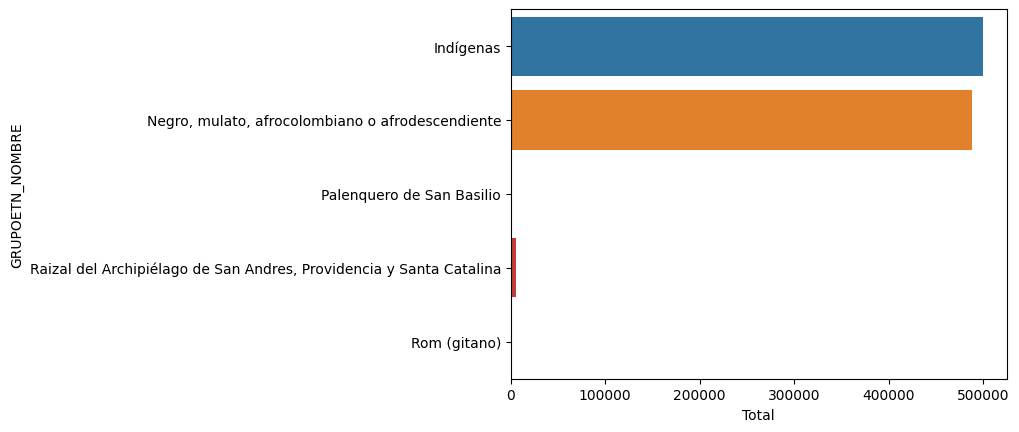

In [ ]:
sns.barplot(x='Total', y='GRUPOETN_NOMBRE', data=df_et, orient='h')

# **Soma do total por jornada**

In [ ]:
df_jn_m = df.groupby('JORNADA_NOMBRE')[['Total']].sum().reset_index()
df_jn_m.sort_values(by='Total', ascending=False, ignore_index=True)

,JORNADA_NOMBRE,Total
0,Mañana,689962
1,Única (Oficiales),134814
2,Tarde,122536
3,Fin de Semana,20580
4,Nocturna,20043
5,Completa/Única (No oficiales),7581


# **Total por grupo étnico (%)**

In [ ]:
df_et_p = (df.groupby('GRUPOETN_NOMBRE')[['Total']].sum() / (df['Total'].sum()) * 100).reset_index()
df_et_p.sort_values(by='Total', ascending=False, ignore_index=True)

,GRUPOETN_NOMBRE,Total
0,Indígenas,50.249117
1,"Negro, mulato, afrocolombiano o afrodescendiente",49.020307
2,"Raizal del Archipiélago de San Andres, Provide...",0.534296
3,Rom (gitano),0.100551
4,Palenquero de San Basilio,0.095729


In [ ]:
df['GRUPOETN_NOMBRE'].value_counts(normalize=True)

Indígenas                                                              0.572689
Negro, mulato, afrocolombiano o afrodescendiente                       0.416425
Raizal del Archipiélago de San Andres, Providencia y Santa Catalina    0.006598
Rom (gitano)                                                           0.002283
Palenquero de San Basilio                                              0.002004
Name: GRUPOETN_NOMBRE, dtype: float64

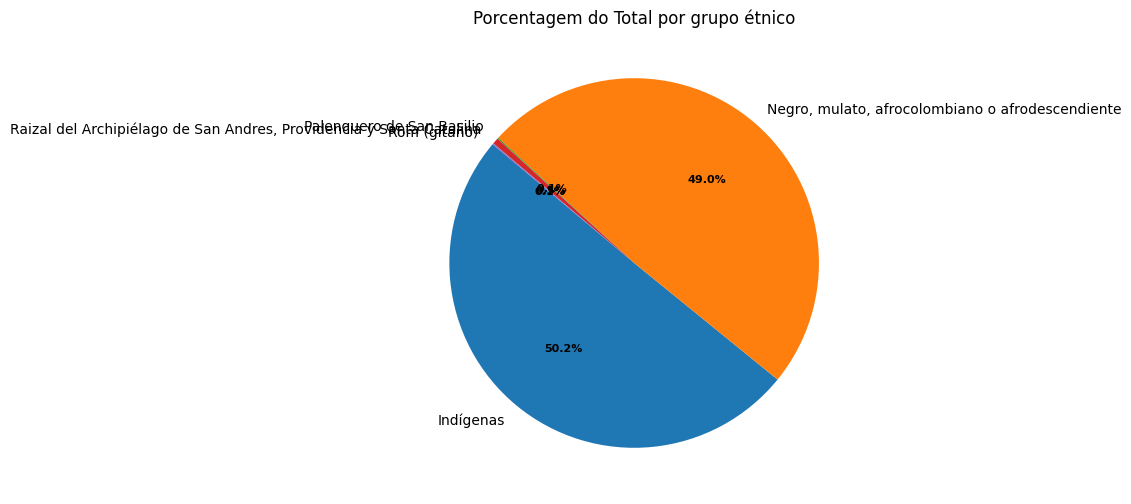

In [ ]:
# Supondo que 'NIVELENSE_NOMBRE' é a coluna que você deseja usar para rótulos e 'Total' é a coluna para valores
labels = df_et_p['GRUPOETN_NOMBRE']
sizes = df_et_p['Total']

# Criar o gráfico de pizza
fig, ax = plt.subplots(figsize=(10,6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops=dict(color="black"))

# Ajustes de layout para evitar sobreposição
plt.setp(autotexts, size=8, weight="bold")

# Adicionar um título
plt.title('Porcentagem do Total por grupo étnico')

# Exibir o gráfico
plt.show()

# **Total por nível de escolaridade**

In [ ]:
df_ne = df.groupby('NIVELENSE_NOMBRE')[['Total']].sum().reset_index()
df_ne.sort_values(by='Total', ascending=False, ignore_index=True)

,NIVELENSE_NOMBRE,Total
0,Básica primaria,475097
1,Básica secundaria,299959
2,Media,94062
3,Preescolar,82040
4,CLEI (Ciclos lectivos integrados - decreto 301...,44358


<Axes: xlabel='Total', ylabel='NIVELENSE_NOMBRE'>

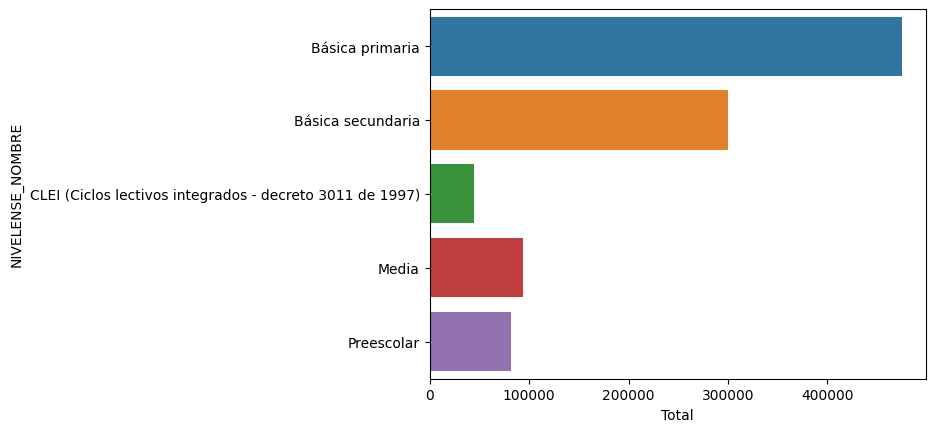

In [ ]:
sns.barplot(x='Total', y='NIVELENSE_NOMBRE', data=df_ne, orient='h')

# **Total por nível de escolaridade (%)**

In [ ]:
df_ne_p = (df.groupby('NIVELENSE_NOMBRE')[['Total']].sum() / (df['Total'].sum()) * 100).reset_index()
df_ne_p.sort_values(by='Total', ascending=False, ignore_index=True)

,NIVELENSE_NOMBRE,Total
0,Básica primaria,47.723693
1,Básica secundaria,30.131007
2,Media,9.448567
3,Preescolar,8.240952
4,CLEI (Ciclos lectivos integrados - decreto 301...,4.455780


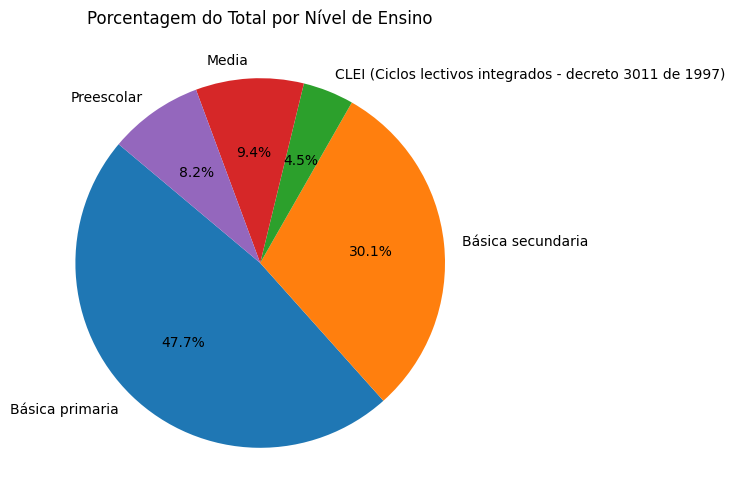

In [ ]:
# Supondo que 'NIVELENSE_NOMBRE' é a coluna que você deseja usar para rótulos e 'Total' é a coluna para valores
labels = df_ne_p['NIVELENSE_NOMBRE']
sizes = df_ne_p['Total']

# Criar o gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Adicionar um título
plt.title('Porcentagem do Total por Nível de Ensino')

# Exibir o gráfico
plt.show()

# **Homens por grupo étnico**

In [ ]:
df_et_homen = df.groupby('GRUPOETN_NOMBRE')[['JORNETN_CANTIDAD_HOMBRE']].sum().reset_index()
df_et_homen.sort_values(by='JORNETN_CANTIDAD_HOMBRE', ascending=False, ignore_index=True)

,GRUPOETN_NOMBRE,JORNETN_CANTIDAD_HOMBRE
0,Indígenas,256961
1,"Negro, mulato, afrocolombiano o afrodescendiente",243801
2,"Raizal del Archipiélago de San Andres, Provide...",2763
3,Rom (gitano),517
4,Palenquero de San Basilio,508


<Axes: xlabel='JORNETN_CANTIDAD_HOMBRE', ylabel='GRUPOETN_NOMBRE'>

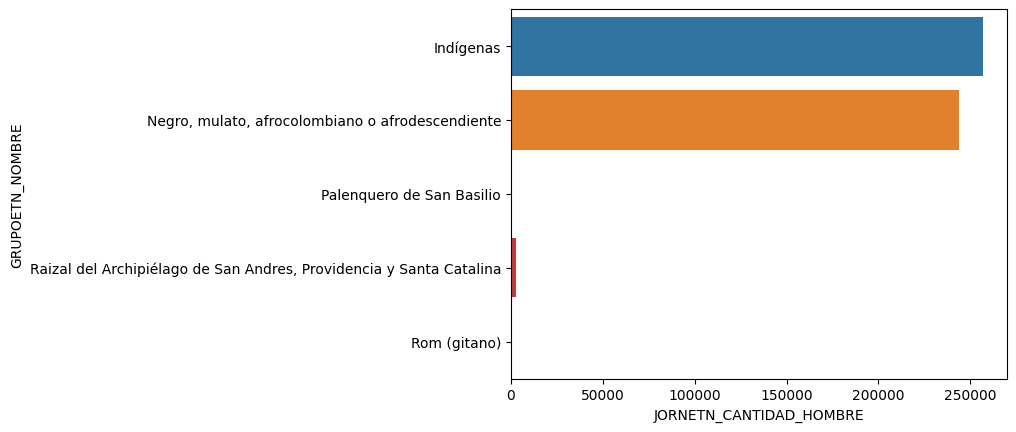

In [ ]:
sns.barplot(x='JORNETN_CANTIDAD_HOMBRE', y='GRUPOETN_NOMBRE', data=df_et_homen, orient='h')

----------------------------------------------------------

# **Mulheres por grupo étnico**

In [ ]:
df_et_mulher = df.groupby('GRUPOETN_NOMBRE')[['JORNETN_CANTIDAD_MUJER']].sum().reset_index()
df_et_mulher.sort_values(by='JORNETN_CANTIDAD_MUJER', ascending=False, ignore_index=True)

,GRUPOETN_NOMBRE,JORNETN_CANTIDAD_MUJER
0,"Negro, mulato, afrocolombiano o afrodescendiente",244204
1,Indígenas,243277
2,"Raizal del Archipiélago de San Andres, Provide...",2556
3,Rom (gitano),484
4,Palenquero de San Basilio,445


<Axes: xlabel='JORNETN_CANTIDAD_MUJER', ylabel='GRUPOETN_NOMBRE'>

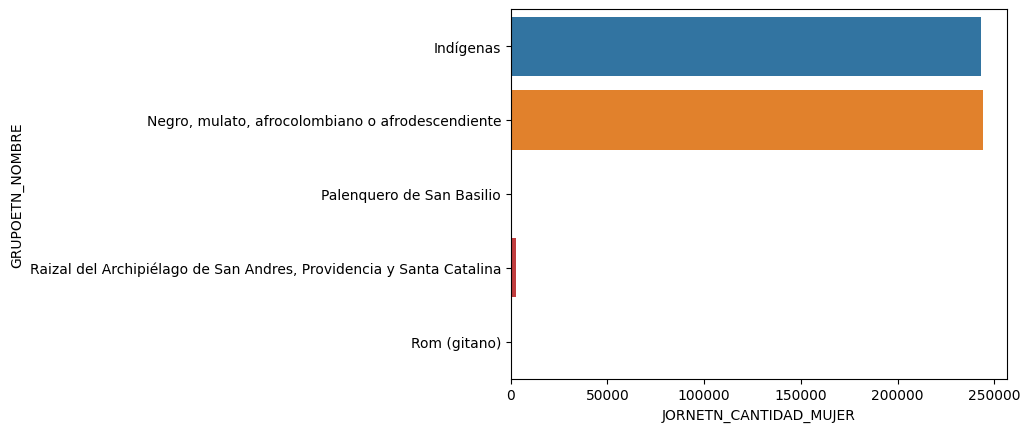

In [ ]:
sns.barplot(x='JORNETN_CANTIDAD_MUJER', y='GRUPOETN_NOMBRE', data=df_et_mulher, orient='h')

# **Soma de homens por jornada**

In [ ]:
df_jn_m_homen = df.groupby('JORNADA_NOMBRE')[['JORNETN_CANTIDAD_HOMBRE']].sum().reset_index()
df_jn_m_homen.sort_values(by='JORNETN_CANTIDAD_HOMBRE', ascending=False, ignore_index=True)

,JORNADA_NOMBRE,JORNETN_CANTIDAD_HOMBRE
0,Mañana,352336
1,Única (Oficiales),68311
2,Tarde,61480
3,Fin de Semana,9237
4,Nocturna,9165
5,Completa/Única (No oficiales),4021


# **Soma de mulheres por jornada**

In [ ]:
df_jn_m_mulher = df.groupby('JORNADA_NOMBRE')[['JORNETN_CANTIDAD_MUJER']].sum().reset_index()
df_jn_m_mulher.sort_values(by='JORNETN_CANTIDAD_MUJER', ascending=False, ignore_index=True)

,JORNADA_NOMBRE,JORNETN_CANTIDAD_MUJER
0,Mañana,337626
1,Única (Oficiales),66503
2,Tarde,61056
3,Fin de Semana,11343
4,Nocturna,10878
5,Completa/Única (No oficiales),3560


# **Homens por nível de escolaridade**

In [ ]:
df_ne_homen = df.groupby('NIVELENSE_NOMBRE')[['JORNETN_CANTIDAD_HOMBRE']].sum().reset_index()
df_ne_homen.sort_values(by='JORNETN_CANTIDAD_HOMBRE', ascending=False, ignore_index=True)

,NIVELENSE_NOMBRE,JORNETN_CANTIDAD_HOMBRE
0,Básica primaria,247306
1,Básica secundaria,151117
2,Media,44464
3,Preescolar,41720
4,CLEI (Ciclos lectivos integrados - decreto 301...,19943


<Axes: xlabel='JORNETN_CANTIDAD_HOMBRE', ylabel='NIVELENSE_NOMBRE'>

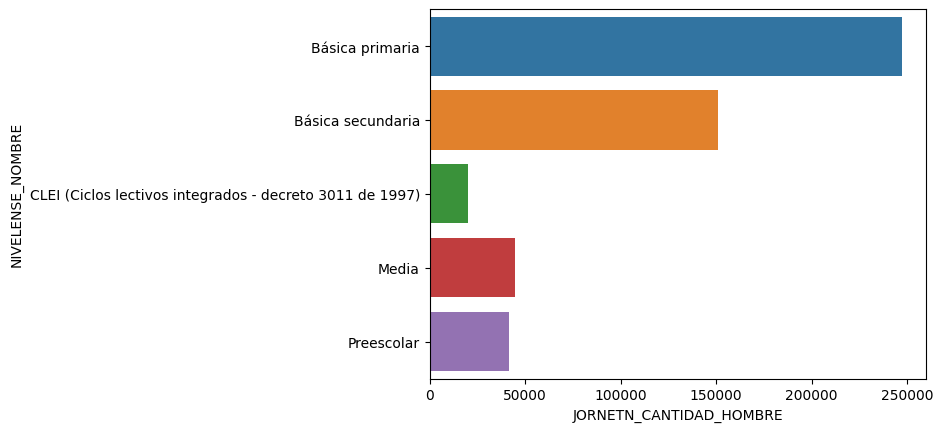

In [ ]:
sns.barplot(x='JORNETN_CANTIDAD_HOMBRE', y='NIVELENSE_NOMBRE', data=df_ne_homen, orient='h')

# **Mulheres por nível de escolaridade**

In [ ]:
 df_ne_mulher = df.groupby('NIVELENSE_NOMBRE')[['JORNETN_CANTIDAD_MUJER']].sum().reset_index()
 df_ne_mulher.sort_values(by='JORNETN_CANTIDAD_MUJER', ascending=False, ignore_index=True)

,NIVELENSE_NOMBRE,JORNETN_CANTIDAD_MUJER
0,Básica primaria,227791
1,Básica secundaria,148842
2,Media,49598
3,Preescolar,40320
4,CLEI (Ciclos lectivos integrados - decreto 301...,24415


<Axes: xlabel='JORNETN_CANTIDAD_MUJER', ylabel='NIVELENSE_NOMBRE'>

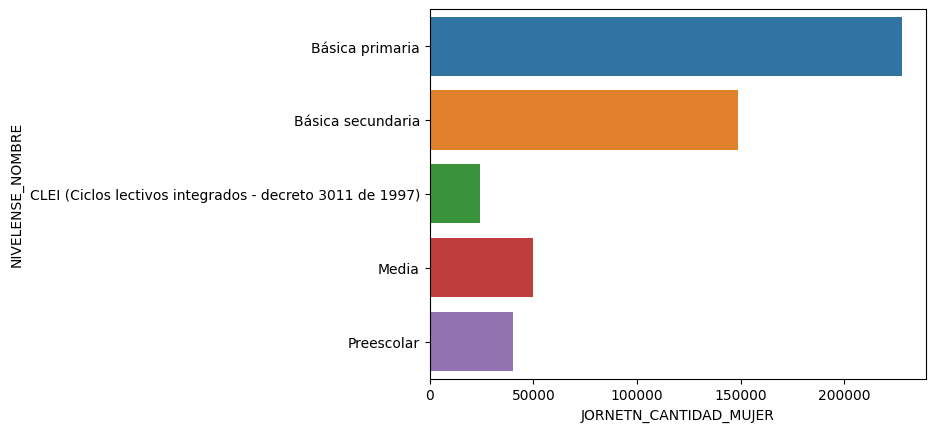

In [ ]:
sns.barplot(x='JORNETN_CANTIDAD_MUJER', y='NIVELENSE_NOMBRE', data=df_ne_mulher, orient='h')